In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,10)
plt.rcParams['figure.dpi']=500
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn import tree
sns.set_theme(style='darkgrid',palette='rainbow')
import warnings
warnings.filterwarnings('ignore')

# Classification

In [2]:
data=pd.read_excel('D:\ExcelR\Data science\Assignments\Random Forest Assignment12\glass.xlsx')
data

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [3]:
data.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [4]:
sns.pairplot(data)

In [5]:
data['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [6]:
sns.countplot(y=data['Type'])

<AxesSubplot:xlabel='count', ylabel='Type'>

## Model Building

In [7]:
x=data.iloc[:,:-1]
y=data['Type']

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [9]:
xtest

RI     Na    Mg    Al     Si     K     Ca    Ba    Fe
108  1.52222  14.43  0.00  1.00  72.67  0.10  11.52  0.00  0.08
206  1.51645  14.94  0.00  1.87  73.11  0.00   8.67  1.38  0.00
106  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28
107  1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24
51   1.51926  13.20  3.33  1.28  72.36  0.60   9.14  0.00  0.11
33   1.51753  12.57  3.47  1.38  73.39  0.60   8.55  0.00  0.06
59   1.51754  13.39  3.66  1.19  72.79  0.57   8.27  0.00  0.11
152  1.51779  13.64  3.65  0.65  73.00  0.06   8.93  0.00  0.00
4    1.51742  13.27  3.62  1.24  73.08  0.55   8.07  0.00  0.00
31   1.51747  12.84  3.50  1.14  73.27  0.56   8.55  0.00  0.00
118  1.51673  13.30  3.64  1.53  72.53  0.65   8.03  0.00  0.29
39   1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.00  0.00
93   1.51590  13.24  3.34  1.47  73.10  0.39   8.22  0.00  0.00
69   1.52300  13.31  3.58  0.82  71.99  0.12  10.17  0.00  0.03
161  1.51934  13.64  3.54  0.75  72.65  0.16   8.89  0.15  0.24
112  1.52777  12.64  0.00  0.67  72.02  0.06  14.40  0.00  0.00
94   1.51629  12.71  3.33  1.49  73.28  0.67   8.24  0.00  0.00
97   1.51743  12.20  3.25  1.16  73.55  0.62   8.90  0.00  0.24
151  1.52127  14.32  3.90  0.83  71.50  0.00   9.49  0.00  0.00
38   1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.00  0.00
44   1.51786  12.73  3.43  1.19  72.95  0.62   8.76  0.00  0.30
200  1.51508  15.15  0.00  2.25  73.50  0.00   8.34  0.63  0.00
84   1.51409  14.25  3.09  2.08  72.28  1.10   7.08  0.00  0.00
18   1.51911  13.90  3.73  1.18  72.12  0.06   8.89  0.00  0.00
158  1.51776  13.53  3.41  1.52  72.04  0.58   8.79  0.00  0.00
35   1.51567  13.29  3.45  1.21  72.74  0.56   8.57  0.00  0.00
73   1.51631  13.34  3.57  1.57  72.87  0.61   7.89  0.00  0.00
122  1.51687  13.23  3.54  1.48  72.84  0.56   8.10  0.00  0.00
19   1.51735  13.02  3.54  1.69  72.73  0.54   8.44  0.00  0.07
62   1.52172  13.51  3.86  0.88  71.79  0.23   9.54  0.00  0.11
169  1.51994  13.27  0.00  1.76  73.03  0.47  11.32  0.00  0.00
181  1.51888  14.99  0.78  1.74  72.50  0.00   9.95  0.00  0.00
34   1.51783  12.69  3.54  1.34  72.95  0.57   8.75  0.00  0.00
11   1.51763  12.80  3.66  1.27  73.01  0.60   8.56  0.00  0.00
29   1.51784  13.08  3.49  1.28  72.86  0.60   8.49  0.00  0.00
0    1.52101  13.64  4.49  1.10  71.78  0.06   8.75  0.00  0.00
159  1.51796  13.50  3.36  1.63  71.94  0.57   8.81  0.00  0.09
148  1.51670  13.24  3.57  1.38  72.70  0.56   8.44  0.00  0.10
130  1.52177  13.75  1.01  1.36  72.19  0.33  11.14  0.00  0.00
28   1.51768  12.56  3.52  1.43  73.15  0.57   8.54  0.00  0.00
16   1.51784  12.68  3.67  1.16  73.11  0.61   8.70  0.00  0.00
198  1.51531  14.38  0.00  2.66  73.10  0.04   9.08  0.64  0.00
195  1.51545  14.14  0.00  2.68  73.39  0.08   9.07  0.61  0.05

In [10]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
ypred

array([6, 7, 7, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 7,
       2, 1, 2, 3, 2, 2, 2, 1, 5, 6, 1, 1, 1, 1, 2, 3, 2, 1, 1, 7, 7],
      dtype=int64)

In [11]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.81      0.89      0.85        19
           2       0.75      0.75      0.75        12
           3       0.50      0.17      0.25         6
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         1
           7       0.80      1.00      0.89         4

    accuracy                           0.77        43
   macro avg       0.73      0.80      0.73        43
weighted avg       0.75      0.77      0.74        43



In [12]:
# visualize the rf

In [13]:
rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1462200836),
 DecisionTreeClassifier(max_features='auto', random_state=753159291),
 DecisionTreeClassifier(max_features='auto', random_state=1781919177),
 DecisionTreeClassifier(max_features='auto', random_state=887694727),
 DecisionTreeClassifier(max_features='auto', random_state=125925557),
 DecisionTreeClassifier(max_features='auto', random_state=1991795514),
 DecisionTreeClassifier(max_features='auto', random_state=1288910192),
 DecisionTreeClassifier(max_features='auto', random_state=386938757),
 DecisionTreeClassifier(max_features='auto', random_state=1339861485),
 DecisionTreeClassifier(max_features='auto', random_state=1374261766),
 DecisionTreeClassifier(max_features='auto', random_state=1823769667),
 DecisionTreeClassifier(max_features='auto', random_state=2012372243),
 DecisionTreeClassifier(max_features='auto', random_state=137005723),
 DecisionTreeClassifier(max_features='auto', random_state=1106097321),
 DecisionTr

In [14]:
len(rf.estimators_)

100

In [15]:
x.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

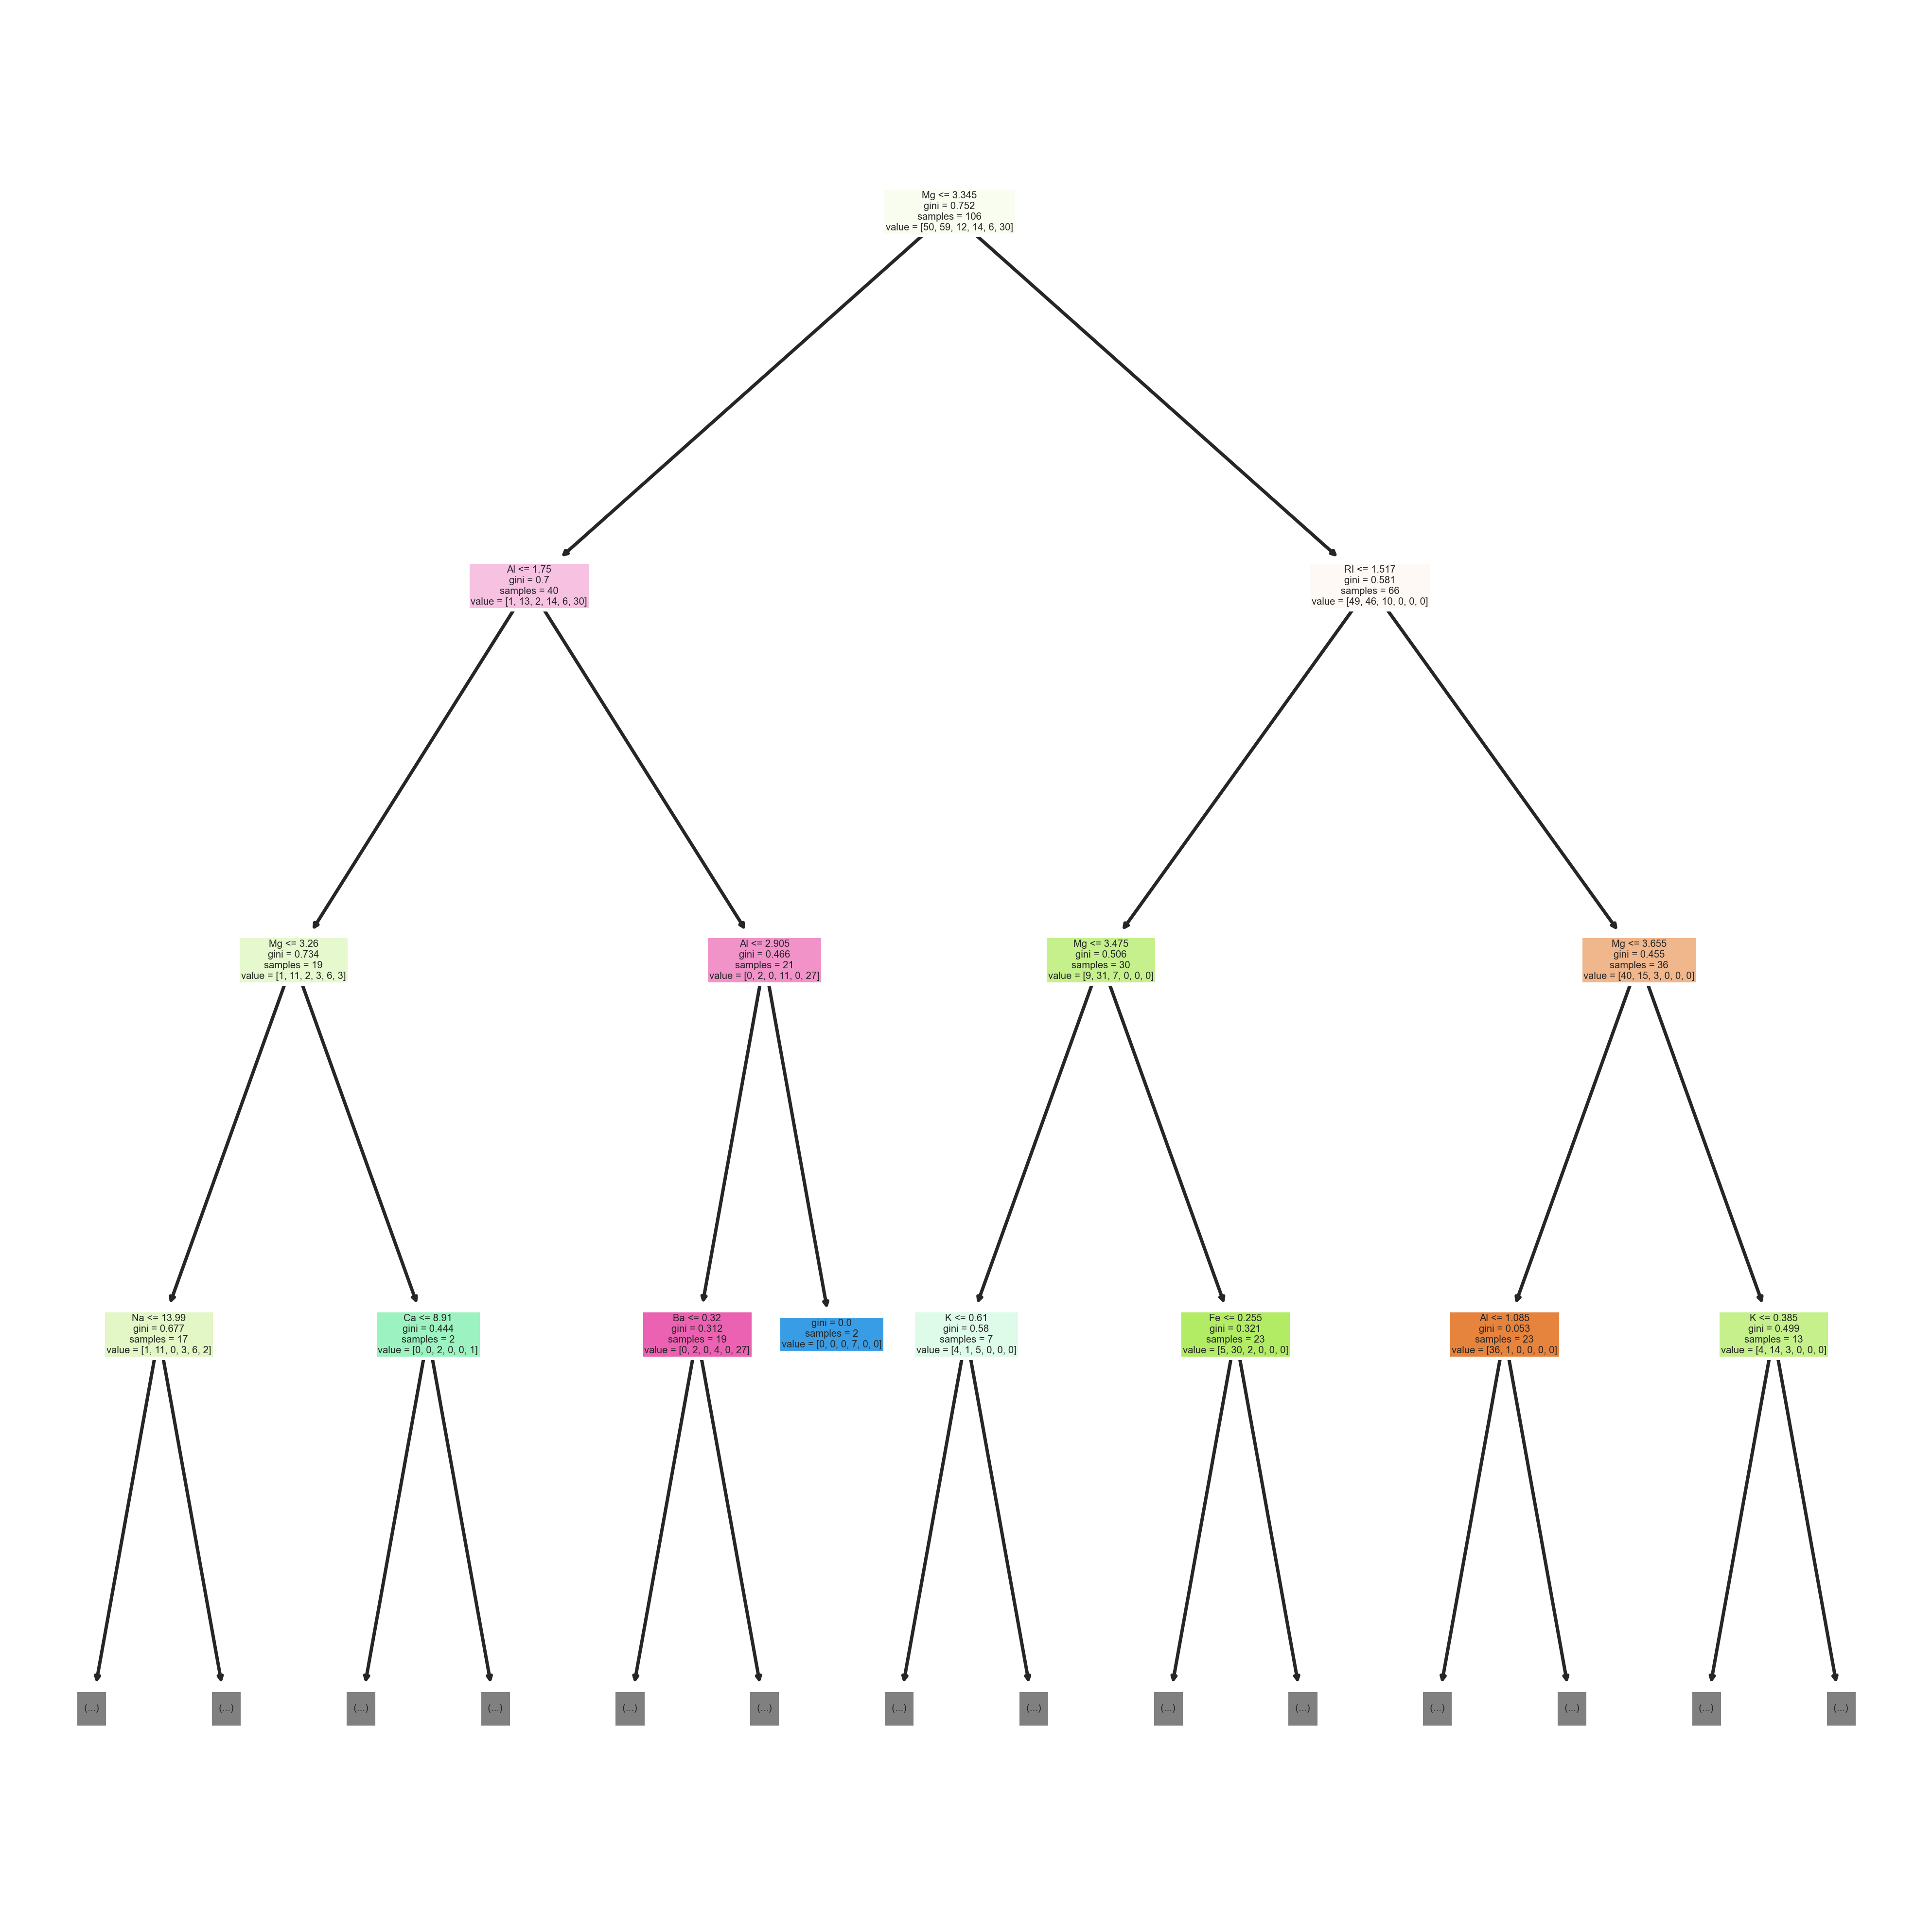

In [16]:
tree.plot_tree(rf.estimators_[0], feature_names=list(x.columns),
               filled=True , max_depth=3)
plt.show()

## Automating Model Building

In [17]:
def prediction(model):
    model.fit(xtrain,ytrain)
    yp = model.predict(xtest)
    print(f"Train Accuracy: {model.score(xtrain,ytrain)}")
    print(f"Test Accuracy: {model.score(xtest,ytest)}")
    print(classification_report(ytest,yp))

In [18]:
prediction(RandomForestClassifier())

Train Accuracy: 1.0
Test Accuracy: 0.7674418604651163
              precision    recall  f1-score   support

           1       0.81      0.89      0.85        19
           2       0.75      0.75      0.75        12
           3       0.50      0.17      0.25         6
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         1
           7       0.80      1.00      0.89         4

    accuracy                           0.77        43
   macro avg       0.73      0.80      0.73        43
weighted avg       0.75      0.77      0.74        43



In [19]:
prediction(GradientBoostingClassifier())

Train Accuracy: 1.0
Test Accuracy: 0.7906976744186046
              precision    recall  f1-score   support

           1       0.75      0.79      0.77        19
           2       1.00      0.92      0.96        12
           3       0.40      0.33      0.36         6
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4

    accuracy                           0.79        43
   macro avg       0.78      0.84      0.79        43
weighted avg       0.79      0.79      0.79        43



In [20]:
prediction(BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=50))

Train Accuracy: 0.9649122807017544
Test Accuracy: 0.7674418604651163
              precision    recall  f1-score   support

           1       0.81      0.89      0.85        19
           2       0.75      0.75      0.75        12
           3       0.50      0.17      0.25         6
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         1
           7       0.80      1.00      0.89         4

    accuracy                           0.77        43
   macro avg       0.73      0.80      0.73        43
weighted avg       0.75      0.77      0.74        43

